### 【 EDA - 산포도 】

- 전체 데이터의 분포 즉, 대표값 기준으로 퍼진 정도 
- 통계량 : 편차, 분산, 표준편차, 평균절대편차, 중위절대편차, 백분위수, 사분위수

[1] 모듈 로딩<hr>

In [ ]:
import pandas as pd                         ## 데이터 분석용
import numpy as np                          ## 로우 데이터 저장 및 수치 계산용
from statsmodels import robust              ## 통계 관련 모듈용
import matplotlib.pyplot as plt             ## 시각화 모듈
import koreanize_matplotlib                 ## 한글 폰트 설정용

[2] 데이터 준비 <hr>

In [4]:
## 데이터 파일
DATA_FILE = '../DATA/state.csv'

stateDF = pd.read_csv(DATA_FILE)
stateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


[3] 데이터의 산포도 <hr>

In [ ]:
## ==========================================================
## 표준편차, 사분위수 , 중위절대편차
## ==========================================================
##- Pandas 
print(f'표준편차 => { stateDF["Population"].std() }')
print(f'1사분위수 => { stateDF["Population"].quantile(0.25) }')
print(f'3사분위수 => { stateDF["Population"].quantile(0.75) }')
print(f'사분위수범위 => { stateDF["Population"].quantile(0.75) - stateDF["Population"].quantile(0.25) }')

##- Numpy
print(f'표준편차     => { np.std(stateDF["Population"]) }')
print(f'1사분위수    => { np.quantile(stateDF["Population"], 0.25) }')

print(f'중위절대편차  => { robust.mad(stateDF["Population"]) }')



표준편차 => 6848235.347401142
1사분위수 => 1833004.25
3사분위수 => 6680312.25
사분위수범위 => 4847308.0
표준편차  => 6779407.114632265
1사분위수 => 1833004.25
표준편차  => 3849876.1459979336


[4] 데이터 분포 시각화 - 상자그림 Boxplot <hr>

In [21]:
## 인구수 분포 시각화
dataSR = stateDF["Population"]/1_000_000

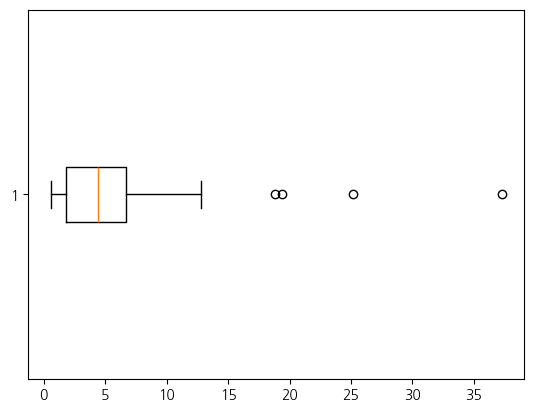

In [ ]:
## 상자그래프 시각화 
retDict = plt.boxplot(dataSR, vert=False)
plt.show()

In [ ]:
## 상자그래프 결과 => Dict
for key in retDict:
    print(key, retDict[key])

## 이상치 데이터만 추출 
outliers = retDict['fliers'][0]
print("이상치", outliers.get_xdata())


whiskers [<matplotlib.lines.Line2D object at 0x000002A30554ACD0>, <matplotlib.lines.Line2D object at 0x000002A30554B610>]
caps [<matplotlib.lines.Line2D object at 0x000002A30555C0D0>, <matplotlib.lines.Line2D object at 0x000002A30555CA50>]
boxes [<matplotlib.lines.Line2D object at 0x000002A30554A2D0>]
medians [<matplotlib.lines.Line2D object at 0x000002A30555D410>]
fliers [<matplotlib.lines.Line2D object at 0x000002A30555DC50>]
means []
[37.253956 18.80131  19.378102 25.145561]


[4] 데이터 분포 시각화 - 도수분포표/히스토그램 <hr>

Population
L-0    24
L-1    14
L-2     6
L-3     2
L-4     1
L-5     1
L-6     1
L-9     1
L-7     0
L-8     0
Name: count, dtype: int64

(array([38.,  8.,  2.,  1.,  1.]), array([  563626.,  7901692., 15239758., 22577824., 29915890., 37253956.]), <BarContainer object of 5 artists>)


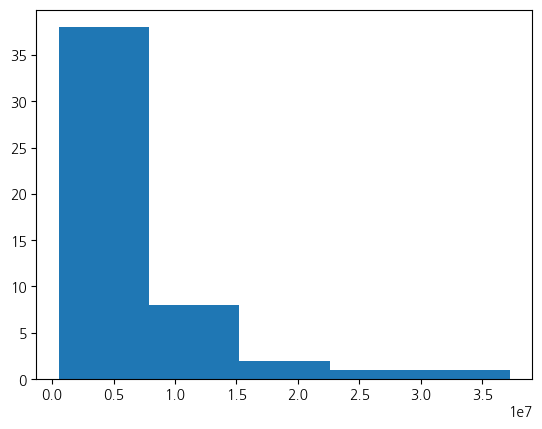

In [64]:
## 수치형 => 범주형 변환. 구간(bin)별로 데이터를 묶어주기
sr, bins = pd.cut(stateDF["Population"], bins=10, retbins=True, labels=[ f'L-{idx}' for idx in range(10)])

## 도수분포표
dataSR = sr.value_counts()
display(dataSR)

## 시각화 
ret=plt.hist(stateDF["Population"].values, bins=5)
print(ret)
plt.show()

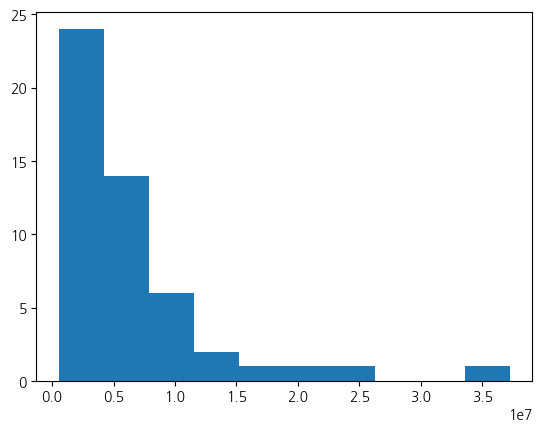

In [67]:
## 시각화 
plt.hist(stateDF["Population"].values, bins=10)
plt.show()